In [2]:
import numpy as np
from scipy import stats
import math
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
pi_digits = np.load("iteration1_int.npz")

In [4]:
pi_10_million = pi_digits['arr_0'][:10000001]

In [5]:
pi_100_thousand = pi_digits['arr_0'][:1001]

# Comparing the experimental distribution with the theoritical distribution

In [6]:
def P(num_of_groups):
    res = []
    for k in range(1, num_of_groups+1):
        res.append(math.log(1+1/(k*(k+2)))/math.log(2))
    res.append(1-sum(res))
    return res

def Y(num_of_groups, pi_million_digits):
    Y = [0] * (num_of_groups+1)
    for digit in pi_million_digits:
        if digit > num_of_groups:
            Y[-1] += 1
        else:
            Y[digit-1] += 1
    return Y

In [7]:
k = 7 # number of groups

In [8]:
p_array = P(k-1)
y_array_mil = Y(k-1, pi_10_million)
y_array_thou = Y(k-1, pi_100_thousand)
for i in range(len(y_array_mil)):
    y_array_mil[i] /= len(pi_10_million)
    y_array_thou[i] /= len(pi_100_thousand)

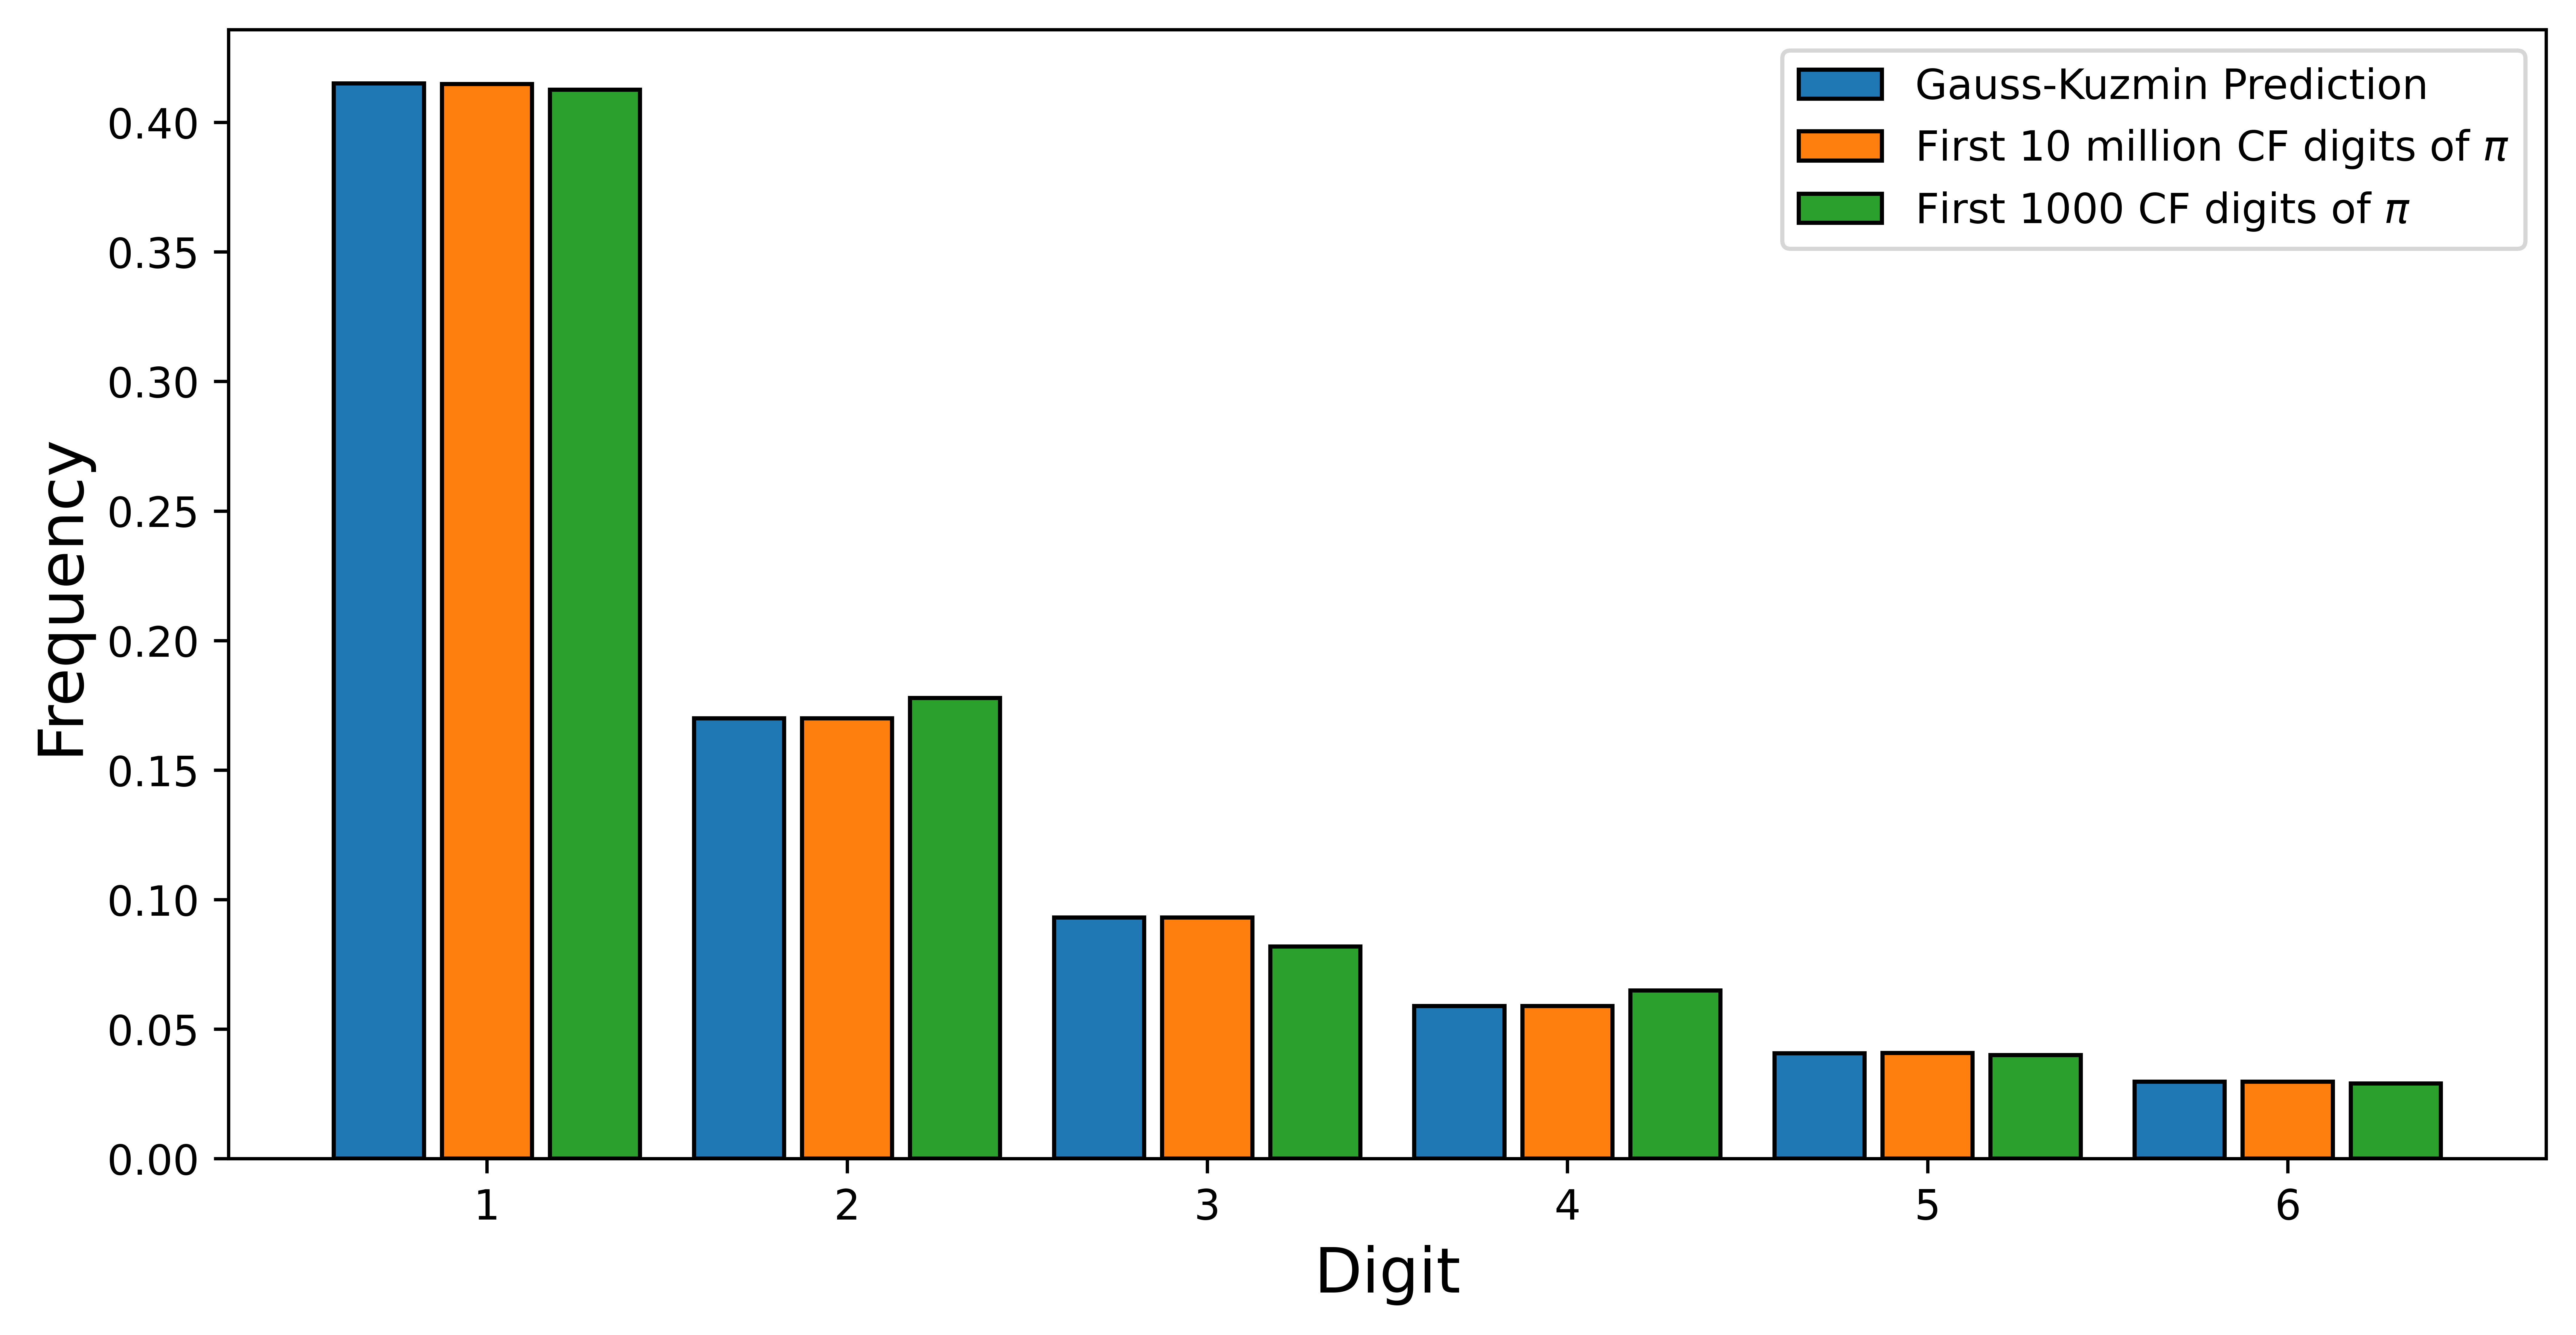

In [11]:
X_axis = np.arange(k-1)
plt.figure(figsize=(10, 5), dpi=1000)
plt.bar(X_axis - 0.3, p_array[:-1], 0.25, label = 'Gauss-Kuzmin Prediction',edgecolor='black')
plt.bar(X_axis, y_array_mil[:-1], 0.25, label = 'First 10 million CF digits of $\pi$',edgecolor='black')
plt.bar(X_axis + 0.3, y_array_thou[:-1], 0.25, label = 'First 1000 CF digits of $\pi$',edgecolor='black')
plt.xticks(X_axis,['1', '2', '3', '4', '5', '6'], fontsize=10)

plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Digit", fontsize=15)
plt.legend()
plt.savefig("experimental_vs_theretical_distribution.png")